# Raça e COVID no Município de SP

DATASUS Tabnet SP - **Mortalidade**: <br>
http://tabnet.saude.prefeitura.sp.gov.br/cgi/deftohtm3.exe?secretarias/saude/TABNET/SIM_PROV/obitop.def

DATASUS Tabnet SP - **População / Raça / Idade**: <br>
http://tabnet.saude.prefeitura.sp.gov.br/cgi/deftohtm3.exe?secretarias/saude/TABNET/POPRC/poprc.def

Instituto Pólis: Raça e COVID no município de São Paulo <br>
https://polis.org.br/estudos/raca-e-covid-no-msp/

Tabelas baixadas (20/11/2020): <br> https://drive.google.com/drive/folders/1DicbK64x5FdDnVdztCkwSuoU8UOlHZIA?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [ ]:
cor_se_ = pd.read_csv('cor-se-suspeitos.csv', sep=';', encoding = "ISO-8859-1",
                     skiprows=[0,1,2,3,12,13,14,15])
cor_se = cor_se_[cor_se_.columns[1:]].apply(pd.to_numeric, errors='coerce').fillna(0)
cor_se['Cor'] = cor_se_['Cor']

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se)

pop_cor_idade_ = pd.read_csv('cor-idade-pop-2010.csv', sep=';', encoding = "ISO-8859-1",
                     skiprows=[0,1,2,11])
pop_cor_idade = pop_cor_idade_[pop_cor_idade_.columns[1:]].apply(pd.to_numeric, errors='coerce').fillna(0)
pop_cor_idade['Cor'] = pop_cor_idade_['Raça / Cor']

print('\n\nPopulação - Raça / Idade')
display(pop_cor_idade.head(10))


Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,SE_20 11_1ºÓbito Covid19,SE_20 12,SE_20 13,SE_20 14,SE_20 15,SE_20 16,SE_20 17,SE_20 18,SE_20 19,SE_20 20,SE_20 21,SE_20 22,SE_20 23,SE_20 24,SE_20 25,SE_20 26,SE_20 27,SE_20 28,SE_20 29,SE_20 30,SE_20 31,SE_20 32,SE_20 33,SE_20 34,SE_20 35,SE_20 36,SE_20 37,SE_20 38,SE_20 39,SE_20 40,SE_20 41,SE_20 42,SE_20 43,SE_20 44,SE_20 45,SE_20 46,SE_20 47,Total,Cor
0,3.0,48.0,178,366.0,445,452.0,519,656.0,620,688,674,696.0,660,661,562,490.0,430.0,443.0,445,410.0,357.0,377.0,337.0,232.0,305.0,237.0,242.0,209.0,165,174.0,128.0,101.0,89.0,79.0,92,124.0,51.0,12745,Branca
1,0.0,2.0,15,56.0,66,56.0,82,104.0,87,122,85,107.0,119,113,99,79.0,77.0,61.0,69,61.0,42.0,41.0,52.0,40.0,28.0,34.0,31.0,36.0,27,22.0,20.0,18.0,15.0,7.0,13,13.0,4.0,1903,Preta
2,0.0,2.0,10,16.0,18,21.0,31,24.0,30,18,19,19.0,22,24,15,16.0,21.0,11.0,19,5.0,13.0,18.0,11.0,10.0,11.0,11.0,11.0,7.0,5,5.0,4.0,7.0,4.0,3.0,2,5.0,3.0,471,Amarela
3,0.0,5.0,37,128.0,178,189.0,215,291.0,303,299,328,274.0,263,266,210,176.0,158.0,152.0,141,151.0,130.0,143.0,133.0,90.0,88.0,82.0,85.0,66.0,55,54.0,53.0,45.0,30.0,27.0,28,36.0,18.0,4927,Parda
4,0.0,0.0,1,0.0,2,0.0,1,0.0,2,1,1,0.0,1,1,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,14,Indígena
5,0.0,0.0,12,17.0,25,28.0,22,42.0,41,40,34,36.0,46,30,36,17.0,20.0,15.0,30,31.0,26.0,14.0,26.0,8.0,12.0,18.0,7.0,9.0,8,11.0,5.0,7.0,6.0,4.0,2,3.0,1.0,689,Não informado
6,3.0,57.0,253,583.0,734,746.0,870,1117.0,1083,1168,1141,1132.0,1111,1095,923,778.0,706.0,682.0,705,658.0,568.0,593.0,559.0,380.0,444.0,382.0,376.0,327.0,261,266.0,210.0,178.0,144.0,120.0,138,181.0,77.0,20749,Total




População - Raça / Idade


,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total,Cor
0,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668,Branca
1,29954,39476,52706,56272,68610,75869,73139,64755,59093,51910,47914,37809,27559,18537,13717,9097,9666.0,736083,Preta
2,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244,Amarela
3,227650,275068,336289,309997,333423,339887,315436,280563,249819,207196,175970,133704,94896,61310,41992,25485,24533.0,3433218,Parda
4,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977,Indígena
5,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313,Ignorado
6,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503,Total


### Agrupando pretos e pardos (afinal pardo é papel ;)

In [ ]:
PRETA, PARDA = 1, 3
cor_se.iloc[PRETA, :-1] = cor_se.iloc[PRETA,:-1] + cor_se.iloc[PARDA,:-1]
cor_se = cor_se.drop(PARDA) 
display(cor_se)

pop_cor_idade.iloc[PRETA,:-1] = pop_cor_idade.iloc[PRETA,:-1] + pop_cor_idade.iloc[PARDA,:-1]
pop_cor_idade = pop_cor_idade.drop(PARDA)
display(pop_cor_idade)

,SE_20 11_1ºÓbito Covid19,SE_20 12,SE_20 13,SE_20 14,SE_20 15,SE_20 16,SE_20 17,SE_20 18,SE_20 19,SE_20 20,SE_20 21,SE_20 22,SE_20 23,SE_20 24,SE_20 25,SE_20 26,SE_20 27,SE_20 28,SE_20 29,SE_20 30,SE_20 31,SE_20 32,SE_20 33,SE_20 34,SE_20 35,SE_20 36,SE_20 37,SE_20 38,SE_20 39,SE_20 40,SE_20 41,SE_20 42,SE_20 43,SE_20 44,SE_20 45,SE_20 46,SE_20 47,Total,Cor
0,3.0,48.0,178,366.0,445,452.0,519,656.0,620,688,674,696.0,660,661,562,490.0,430.0,443.0,445,410.0,357.0,377.0,337.0,232.0,305.0,237.0,242.0,209.0,165,174.0,128.0,101.0,89.0,79.0,92,124.0,51.0,12745,Branca
1,0.0,7.0,52,184.0,244,245.0,297,395.0,390,421,413,381.0,382,379,309,255.0,235.0,213.0,210,212.0,172.0,184.0,185.0,130.0,116.0,116.0,116.0,102.0,82,76.0,73.0,63.0,45.0,34.0,41,49.0,22.0,6830,Preta
2,0.0,2.0,10,16.0,18,21.0,31,24.0,30,18,19,19.0,22,24,15,16.0,21.0,11.0,19,5.0,13.0,18.0,11.0,10.0,11.0,11.0,11.0,7.0,5,5.0,4.0,7.0,4.0,3.0,2,5.0,3.0,471,Amarela
4,0.0,0.0,1,0.0,2,0.0,1,0.0,2,1,1,0.0,1,1,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,14,Indígena
5,0.0,0.0,12,17.0,25,28.0,22,42.0,41,40,34,36.0,46,30,36,17.0,20.0,15.0,30,31.0,26.0,14.0,26.0,8.0,12.0,18.0,7.0,9.0,8,11.0,5.0,7.0,6.0,4.0,2,3.0,1.0,689,Não informado
6,3.0,57.0,253,583.0,734,746.0,870,1117.0,1083,1168,1141,1132.0,1111,1095,923,778.0,706.0,682.0,705,658.0,568.0,593.0,559.0,380.0,444.0,382.0,376.0,327.0,261,266.0,210.0,178.0,144.0,120.0,138,181.0,77.0,20749,Total


,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total,Cor
0,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668,Branca
1,257604,314544,388995,366269,402033,415756,388575,345318,308912,259106,223884,171513,122455,79847,55709,34582,34199.0,4169301,Preta
2,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244,Amarela
4,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977,Indígena
5,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313,Ignorado
6,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503,Total


## Taxa de Mortalidade: Corrigindo pela população de cada cor

,Cor,Habitantes,Semana Epidemiológica,Óbitos,Óbitos por 100 mil
135,Indígena,12977,SE_20 46,14.0,107.883178
136,Branca,6824668,SE_20 47,12742.0,186.705053
137,Preta,4169301,SE_20 47,6830.0,163.816429
138,Amarela,246244,SE_20 47,471.0,191.273696
139,Indígena,12977,SE_20 47,14.0,107.883178


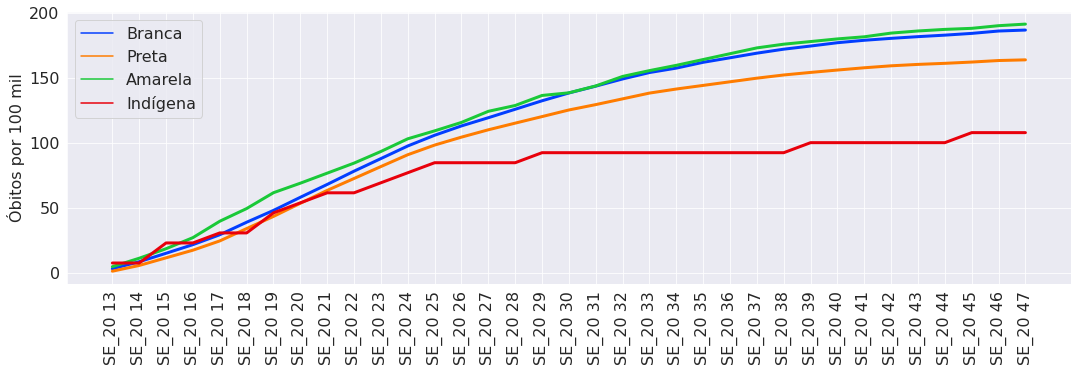

In [ ]:
cor_se_norm = cor_se.loc[:, cor_se.columns[1:-2]]
cor_se_norm = cor_se_norm.cumsum(axis=1)

cor_se_norm['Cor'] = cor_se['Cor']
cor_se_norm['Habitantes'] = pop_cor_idade.loc[:,'Total']
cor_se_norm = cor_se_norm.drop([5, 6]) # Não informado

cor_se_norm = cor_se_norm.melt(id_vars=['Cor', 'Habitantes'], value_vars = cor_se_norm.columns[1:-2],
                               var_name='Semana Epidemiológica', value_name='Óbitos')

cor_se_norm['Óbitos por 100 mil'] = (100_000 * cor_se_norm['Óbitos']) / cor_se_norm['Habitantes']
display(cor_se_norm.tail())

fig, axs = plt.subplots(figsize=(18, 5))
sns.lineplot(data=cor_se_norm, x='Semana Epidemiológica', y='Óbitos por 100 mil', hue='Cor', palette='bright', lw=3)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('')
plt.show()

## Corrigindo por Idade

,Cor,Total,Faixa Etária,Habitantes,Habitantes por total cor
0,Branca,6824668,0 a 4,444168,0.065083
1,Preta,4169301,0 a 4,257604,0.061786
2,Amarela,246244,0 a 4,8329,0.033824
3,Indígena,12977,0 a 4,813,0.062649
4,Branca,6824668,5 a 9,433860,0.063572


(0.0, 0.14)

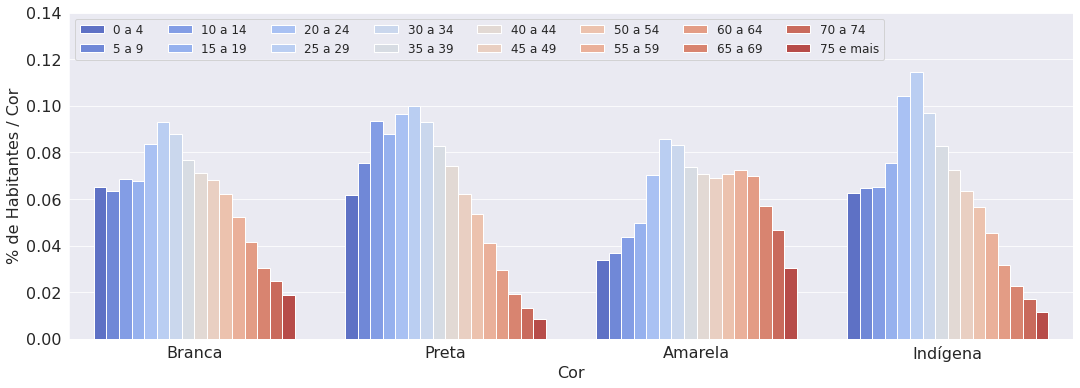

In [ ]:
df = pop_cor_idade.iloc[:-2].drop('Ignorada', axis=1)
df = df.melt(id_vars=['Cor', 'Total'], value_vars=df.columns[:-2], var_name='Faixa Etária', value_name="Habitantes")
df.loc[:, 'Habitantes'] = pd.to_numeric(df['Habitantes'], errors='coerce')
df.loc[:, 'Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Habitantes por total cor'] = df['Habitantes'] / df.loc[:, 'Total']
display(df.head())

fig, axs = plt.subplots(figsize=(18, 6))
sns.barplot(data=df, hue='Faixa Etária', y='Habitantes por total cor', x='Cor', ax=axs, palette='coolwarm')
plt.legend(loc='upper left', ncol=len(pop_cor_idade.columns[1:-1])//2, fontsize=12)
plt.ylabel('% de Habitantes / Cor')
plt.ylim(0, 0.14)

In [ ]:
cor_idade_ = pd.read_csv('cor-idade-suspeitos-2020.csv', sep=';', encoding = "ISO-8859-1",
                     skiprows=[0,1,2,3,12,13,14,15])

cor_idade = cor_idade_.apply(pd.to_numeric, errors='coerce').fillna(0)
cor_idade.iloc[PRETA] = cor_idade.iloc[PRETA] + cor_idade.iloc[PARDA]
cor_idade = cor_idade.drop(PARDA)
cor_idade = cor_idade.drop(5) # Não informado
cor_idade['Cor'] = cor_idade_['Cor']

print('\n\nÓbitos confirmados de COVID - Raça / Idade')
display(cor_idade)



Óbitos confirmados de COVID - Raça / Idade


,Cor,0-4a,5-9a,10-14a,15-19a,20-24a,25-29a,30-34a,35-39a,40-44a,45-49a,50-54a,55-59a,60-64a,65-69a,70-74a,75 e mais,Ign,Total
0,Branca,20.0,9.0,7.0,17.0,34.0,47.0,112.0,153.0,223.0,280.0,475.0,723.0,1071.0,1352.0,1537.0,6748.0,3.0,12811.0
1,Preta,18.0,6.0,4.0,15.0,33.0,53.0,98.0,171.0,245.0,318.0,469.0,575.0,762.0,885.0,890.0,2316.0,3.0,6861.0
2,Amarela,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,6.0,9.0,23.0,24.0,40.0,58.0,311.0,0.0,476.0
4,Indígena,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,6.0,0.0,14.0
6,Total,40.0,15.0,12.0,35.0,71.0,100.0,214.0,338.0,487.0,632.0,990.0,1383.0,1929.0,2357.0,2562.0,9685.0,7.0,20857.0


In [ ]:
cor_idade_melt = cor_idade.melt(id_vars=['Cor', 'Total'], value_vars=cor_idade.columns[1:-2],
                                var_name='Faixa Etária', value_name='Óbitos')

cores = list(pop_cor_idade['Cor'].values)
faixa_etaria = { cor_idade.columns[k+1]: k for k in range(len(cor_idade.columns[1:-2])) }
habitantes = []
for i in range(len(cor_idade_melt)):
  linha = cor_idade_melt.iloc[i]
  hab = pop_cor_idade.iloc[cores.index(linha['Cor']), faixa_etaria[linha['Faixa Etária']]  ]
  habitantes.append(hab)

cor_idade_melt['Habitantes'] = habitantes
display(cor_idade_melt.tail(20)) 

,Cor,Total,Faixa Etária,Óbitos,Habitantes
60,Branca,12811.0,60-64a,1071.0,283006
61,Preta,6861.0,60-64a,762.0,122455
62,Amarela,476.0,60-64a,24.0,17175
63,Indígena,14.0,60-64a,0.0,413
64,Total,20857.0,60-64a,1929.0,423055
65,Branca,12811.0,65-69a,1352.0,208206
66,Preta,6861.0,65-69a,885.0,79847
67,Amarela,476.0,65-69a,40.0,13987
68,Indígena,14.0,65-69a,2.0,293
69,Total,20857.0,65-69a,2357.0,302338


### População Padrão


,Cor,Total,Faixa Etária,Óbitos,Habitantes,Óbitos por 100 mil
0,Branca,12811.0,0-4a,20.0,444168,4.502801
1,Preta,6861.0,0-4a,18.0,257604,6.987469
2,Amarela,476.0,0-4a,0.0,8329,0.000000
3,Indígena,14.0,0-4a,1.0,813,123.001230
4,Total,20857.0,0-4a,40.0,710927,5.626457


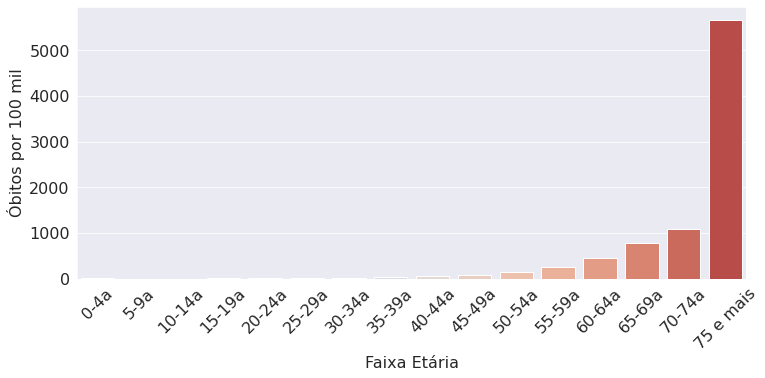

In [ ]:
cor_idade_melt['Óbitos por 100 mil'] = (100_000 * cor_idade_melt['Óbitos']) / cor_idade_melt['Habitantes']
display(cor_idade_melt.head())

fig, axs = plt.subplots(figsize=(12, 5))
sns.barplot(data = cor_idade_melt[cor_idade_melt['Cor'] == 'Total'], x='Faixa Etária', 
            y='Óbitos por 100 mil', ax=axs, palette='coolwarm')
plt.xticks(rotation=45) 
plt.show()

### Referência x Realidade

,Total,Óbitos,Habitantes,Óbitos por 100 mil,Esperados
Cor,,,,,
Amarela,7616.0,476.0,237227,5315.560456,848.532643
Branca,204976.0,12808.0,6663579,7667.434643,14747.113764
Indígena,224.0,14.0,12807,5694.692200,20.027228
Preta,109776.0,6858.0,4135102,10881.842349,5234.004559


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  # This is added back by InteractiveShellApp.init_path()


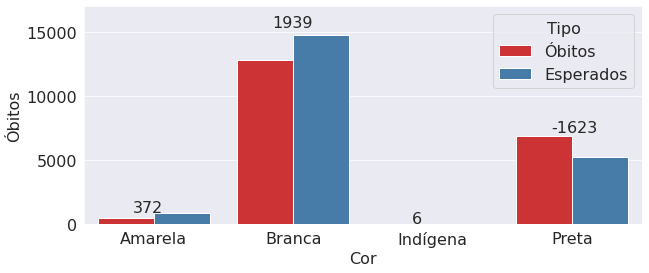

In [ ]:
pop_padrao = cor_idade_melt[cor_idade_melt['Cor'] == 'Total']['Óbitos por 100 mil'].to_numpy()

cor_idade_melt['Esperados'] = cor_idade_melt['Habitantes'] * np.repeat(pop_padrao, 5) / 100_000
resultado = cor_idade_melt.groupby('Cor').sum() 
resultado = resultado.drop('Total')
display(resultado)
print('\n')
 
resultado['Cor'] = resultado.index
resultado_melt = resultado.melt(id_vars=['Cor'], value_vars=['Óbitos', 'Esperados'], 
                                var_name='Tipo', value_name='Óbitos' )

# resultado_melt
fig, axs = plt.subplots(figsize=(10, 4))
sns.barplot(data=resultado_melt, x='Cor', hue='Tipo', y='Óbitos', ax=axs, palette='Set1')

diff = (resultado['Esperados'] - resultado['Óbitos'] ).to_numpy() 
for k, d in enumerate(diff):
  altura = max(resultado['Esperados'].iloc[k], resultado['Óbitos'].iloc[k])
  plt.text(k-0.15, altura*1.04, str(int(d)) )

plt.ylim(0, 17000)
plt.show()

Text(0, 0.5, 'Óbitos por cor por 100 mil habitantes')

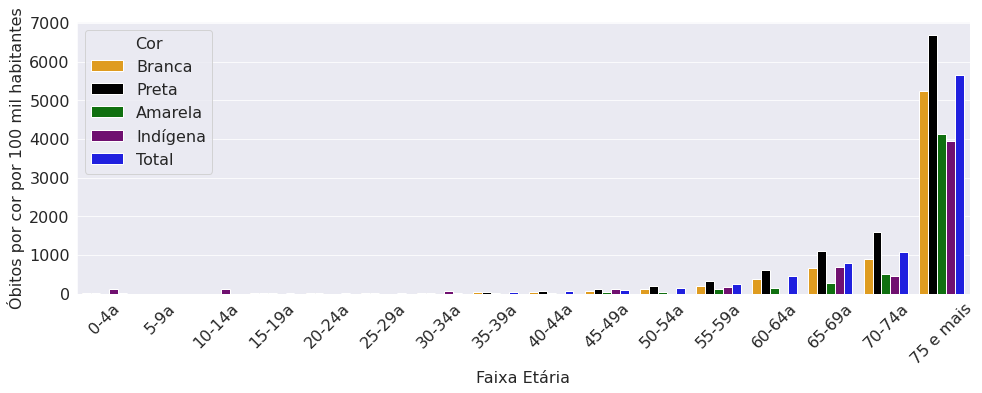

In [ ]:
colors = ['orange', 'k', 'g', 'purple', 'b']
fig, axs = plt.subplots(figsize=(16, 5))
sns.barplot(data = cor_idade_melt, x='Faixa Etária', hue='Cor', 
            y='Óbitos por 100 mil', ax=axs, palette=sns.color_palette(colors) )
plt.xticks(rotation=45) 
plt.ylabel('Óbitos por cor por 100 mil habitantes')